In [1]:
%matplotlib inline
%time from hikyuu.interactive import *
from pylab import plot

2024-04-02 16:52:36,011 [INFO] hikyuu version: 1.3.5_202404021336_RELEASE_windows_x64 [<module>] (D:\workspace\hikyuu\hikyuu\__init__.py:91) [hikyuu::hku_info]


2024-04-02 16:52:36.400 [HKU-I] - Using MYSQL BaseInfoDriver (BaseInfoDriver.cpp:58)
2024-04-02 16:52:36.428 [HKU-I] - Loading market information... (StockManager.cpp:532)
2024-04-02 16:52:36.440 [HKU-I] - Loading stock type information... (StockManager.cpp:545)
2024-04-02 16:52:36.446 [HKU-I] - Loading stock information... (StockManager.cpp:460)
2024-04-02 16:52:36.588 [HKU-I] - Loading stock weight... (StockManager.cpp:562)
2024-04-02 16:52:37.734 [HKU-I] - Loading KData... (StockManager.cpp:133)
2024-04-02 16:52:38.442 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:171)
2024-04-02 16:52:38.442 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:174)
2024-04-02 16:52:38.443 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:177)
2024-04-02 16:52:38.451 [HKU-I] - 0.72s Loaded Data. (StockManager.cpp:150)
CPU times: total: 297 ms
Wall time: 2.95 s


In [2]:
# 创建一个系统策略
# my_mm = MM_FixedCount(100)
my_mm = MM_Nothing()
my_sg = my_sg = SG_Flex(EMA(CLOSE(), n=5), slow_n=10)
my_sys = SYS_Simple(sg=my_sg, mm=my_mm)

In [3]:
# 创建一个选择算法，用于在每日选定交易系统
# 此处是固定选择器，即每日选出的都是指定的交易系统
# my_se = SE_Fixed([s for s in blocka if s.valid], my_sys)
my_se = SE_Fixed([s for s in sm.get_block("指数板块", "沪深300")], my_sys)

In [4]:
# 创建一个资产分配器，用于确定如何在选定的交易系统中进行资产分配
# 此处创建的是一个等比例分配资产的分配器，即按相同比例在选出的系统中进行资金分配
my_af = AF_EqualWeight()

In [5]:
# 创建资产组合
# 创建一个从2001年1月1日开始的账户，初始资金200万元。这里由于使用的等比例分配器，意味着将账户剩余资金在所有选中的系统中平均分配，
# 如果初始资金过小，将导致每个系统都没有充足的资金完成交易。
my_tm = crtTM(Datetime(200101010000), 2000000)
my_pf = PF_Simple(tm=my_tm, af=my_af, se=my_se)

In [6]:
# 运行投资组合
q = Query(-500)
%time my_pf.run(Query(-500), 10)

spend time:  14.395 ms | Portfolio_readyForRun  (hikyuu_cpp\hikyuu\trade_sys\portfolio\Portfolio.cpp:110)
2024-04-02 16:53:00.351 [HKU-E] - 2022-04-12 00:00:00 cash(238.0800) must be <= current cash(238.0800)! (TradeManager.cpp:460)
2024-04-02 16:53:00.806 [HKU-E] - 2023-06-20 00:00:00 cash(548.0800) must be <= current cash(548.0800)! (TradeManager.cpp:460)
2024-04-02 16:53:00.822 [HKU-E] - 2023-07-06 00:00:00 cash(536.8200) must be <= current cash(536.8200)! (TradeManager.cpp:460)
2024-04-02 16:53:00.838 [HKU-E] - 2023-07-20 00:00:00 cash(751.9400) must be <= current cash(751.9400)! (TradeManager.cpp:460)
2024-04-02 16:53:00.942 [HKU-E] - 2023-11-03 00:00:00 cash(1684.1600) must be <= current cash(1684.1600)! (TradeManager.cpp:460)
2024-04-02 16:53:00.959 [HKU-E] - 2023-11-17 00:00:00 cash(1684.1600) must be <= current cash(1684.1600)! (TradeManager.cpp:460)
2024-04-02 16:53:00.987 [HKU-E] - 2023-12-01 00:00:00 cash(1684.1600) must be <= current cash(1684.1600)! (TradeManager.cpp:460)

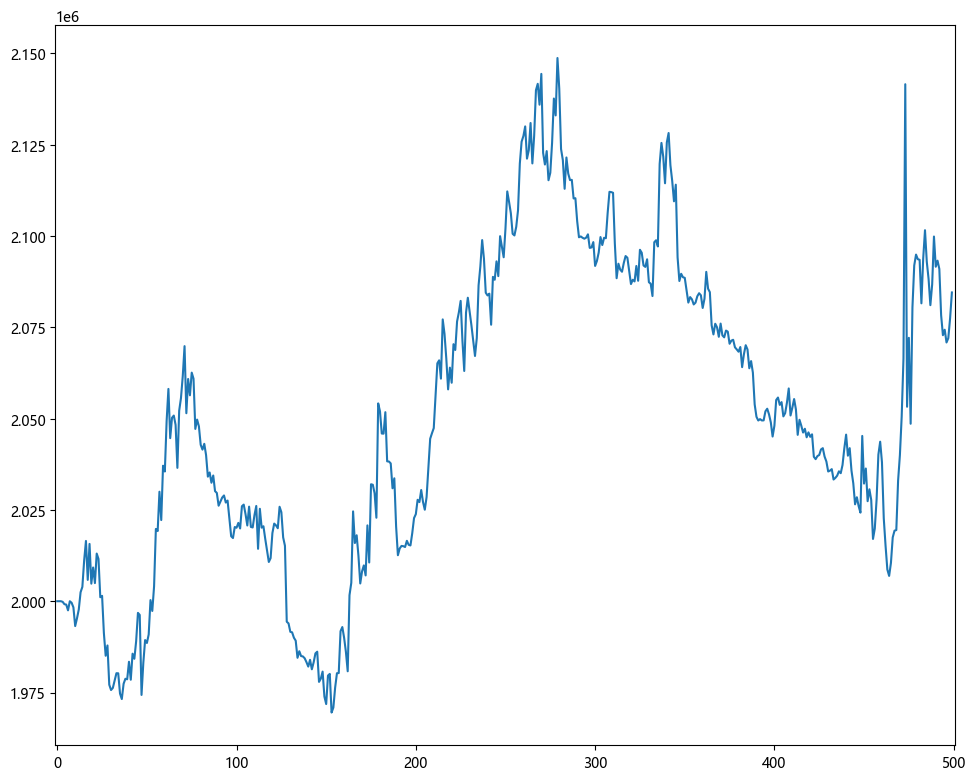

In [7]:
x = my_tm.get_funds_curve(sm.get_trading_calendar(q))
PRICELIST(x).plot()

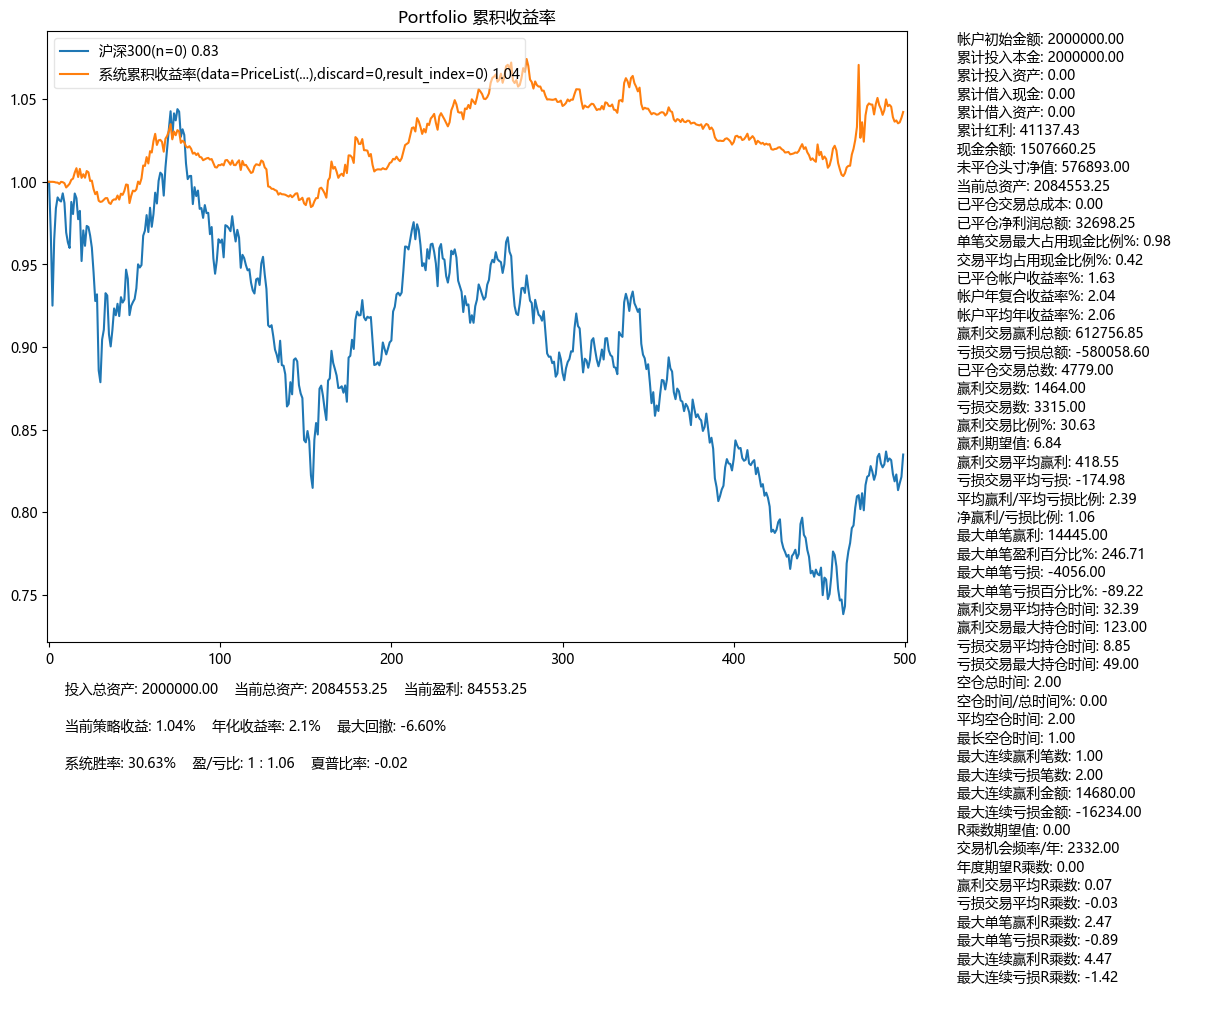

In [8]:
my_pf.performance()

In [9]:
my_tm

TradeManager {
  params: params[precision(int): 2, save_action(bool): 1, support_borrow_cash(bool): 0, support_borrow_stock(bool): 0, ],
  name: SYS,
  init_date: 2001-01-01 00:00:00,
  init_cash: 2000000.00,
  firstDatetime: 2022-03-16 00:00:00,
  lastDatetime: 2024-04-01 00:00:00,
  TradeCostFunc: TradeCostFunc(TC_Zero, params[]),
  current total funds: 2084553.25,
  current cash: 1507660.25,
  current market_value: 576893.00,
  current short_market_value: 0.00,
  current base_cash: 2000000.00,
  current base_asset: 0.00,
  current borrow_cash: 0.00,
  current borrow_asset: 0.00,
  Position: 
    SH600028 中国石化 2024-04-01 00:00:00 1 1000.00 6390.00 6360.00 -30.00 -0.47% -0.00%
    SH600011 华能国际 2024-03-27 00:00:00 4 600.00 5556.00 5520.00 -36.00 -0.65% -0.00%
    SH600031 三一重工 2024-03-20 00:00:00 9 400.00 5660.00 5992.00 332.00 5.87% 0.02%
    SH600015 华夏银行 2024-03-25 00:00:00 6 1100.00 6952.00 7216.00 264.00 3.80% 0.01%
    SH600016 民生银行 2024-03-28 00:00:00 3 1700.00 6919.00 6834.00 